In [1]:
import os
import glob

import pandas as pd
import matplotlib.pyplot as plt
from dynamic_routing_analysis import decoding_utils, plot_utils

%load_ext autoreload
%autoreload 2
%matplotlib widget


In [2]:
#set path to decoding results
loadpath=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\linear_shift_20_units"
files=glob.glob(os.path.join(loadpath,'*_decoding_results*.pkl'))

## plot single session linear shift decoder results

C:\Users\ethan.mcbride\Code\dynamic_routing_analysis\src\dynamic_routing_analysis\plot_utils.py:850: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(1,1)


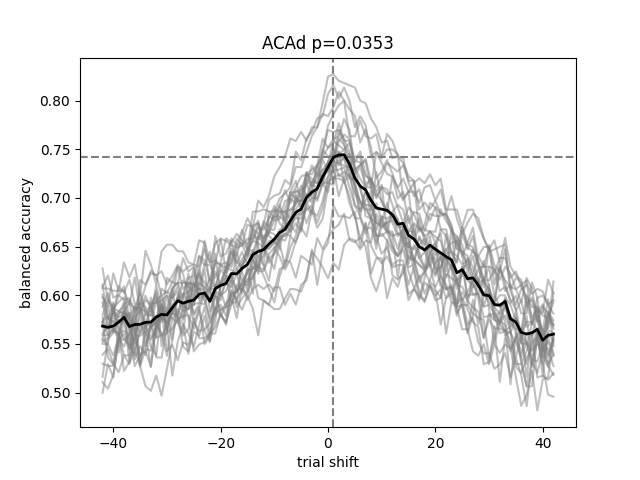

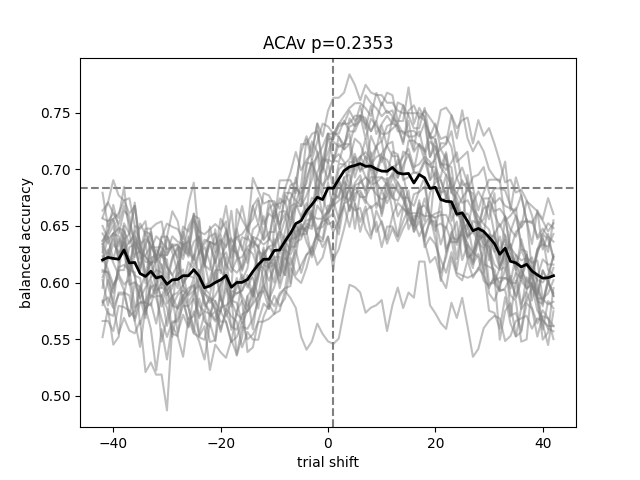

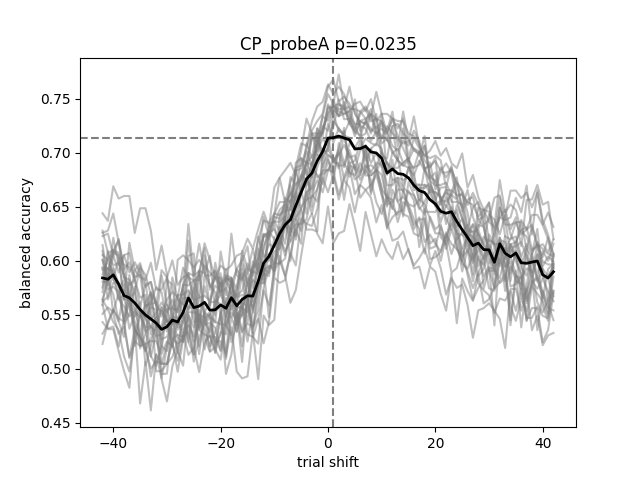

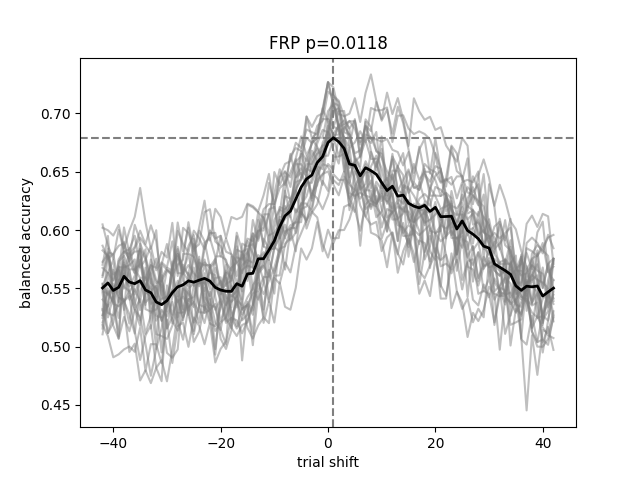

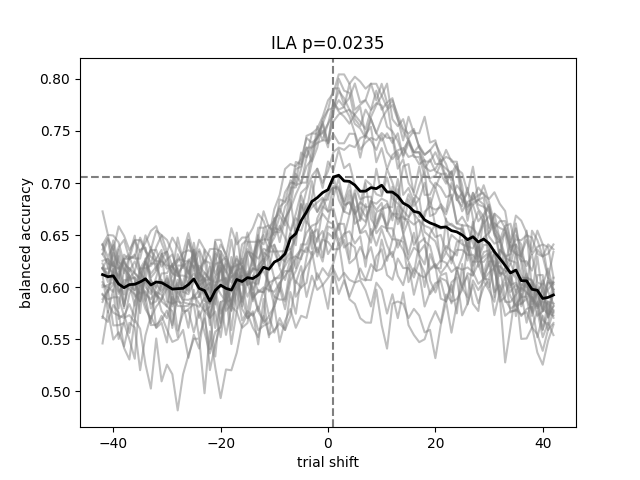

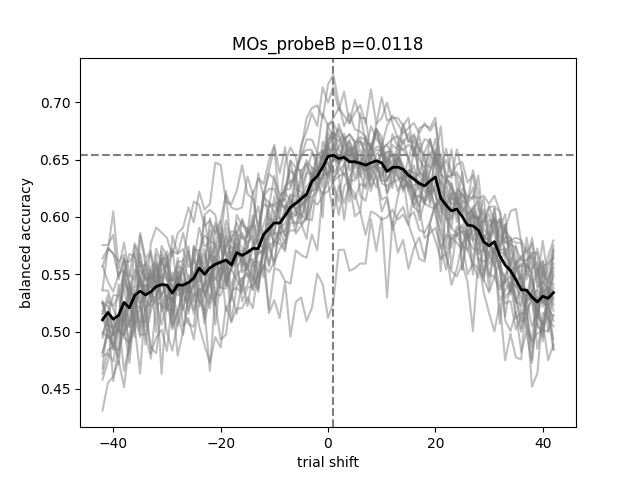

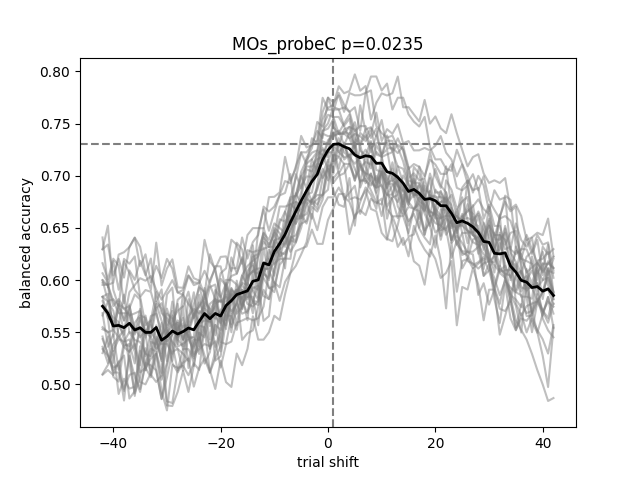

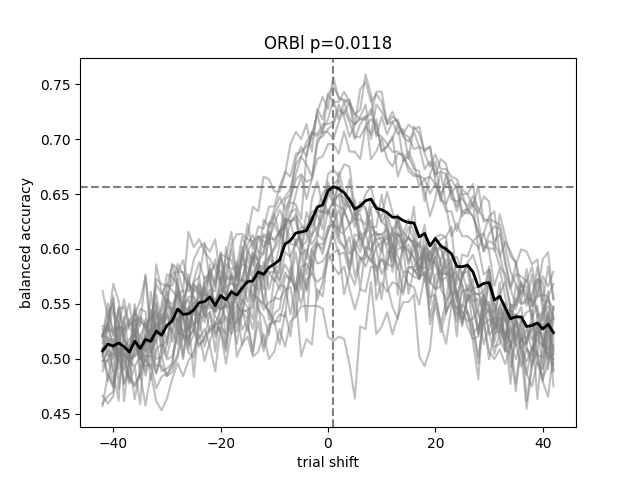

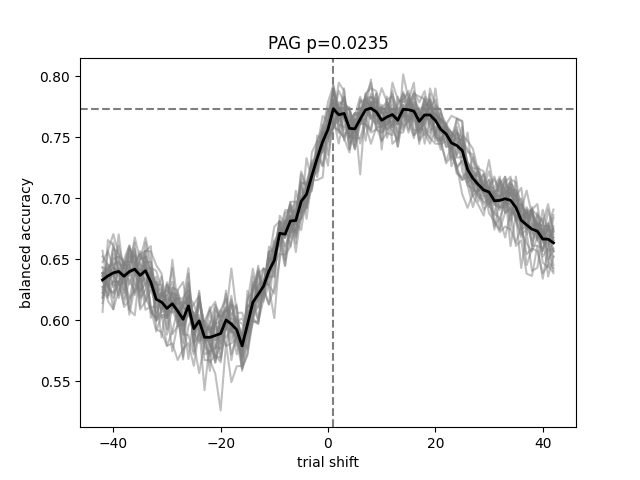

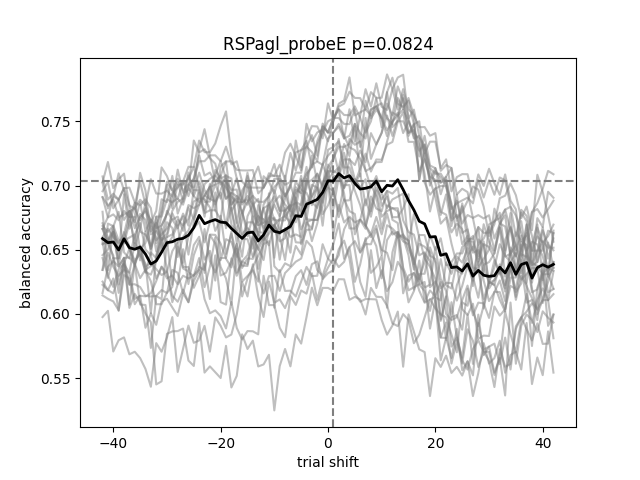

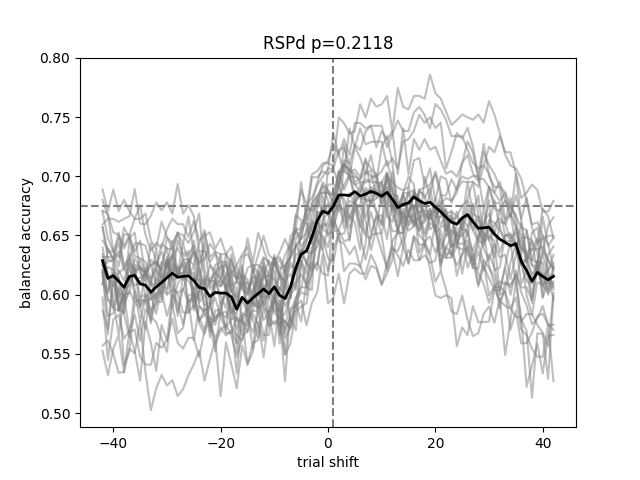

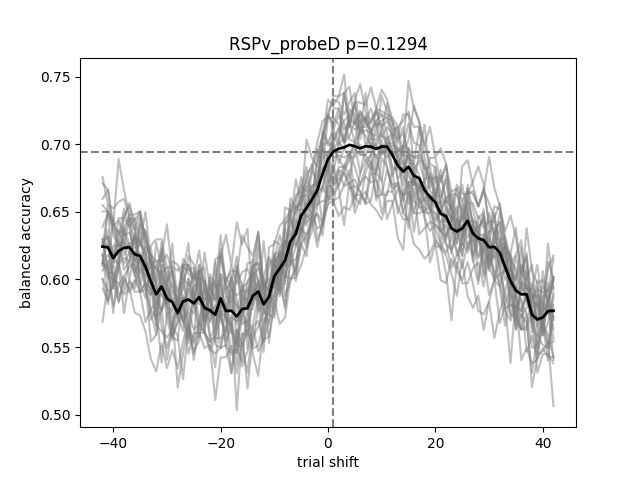

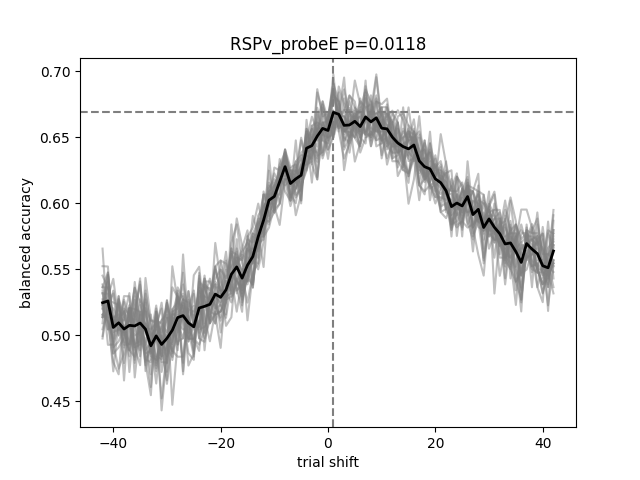

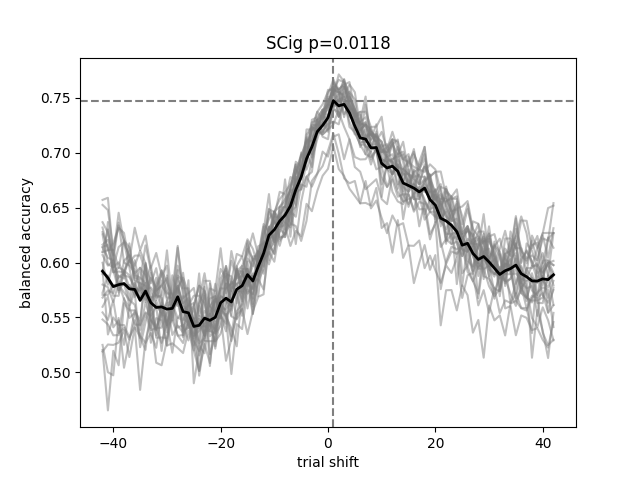

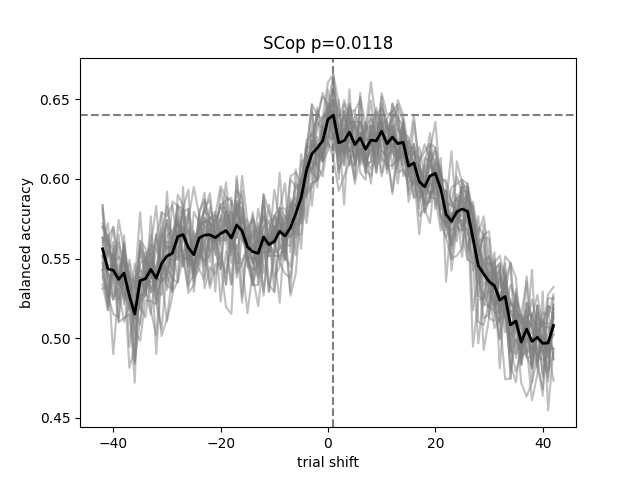

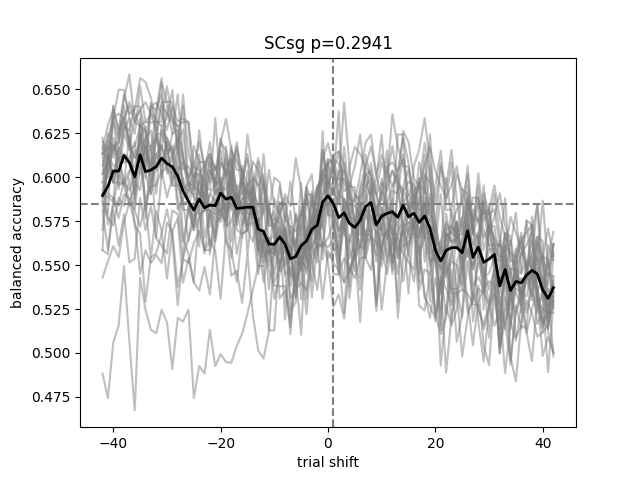

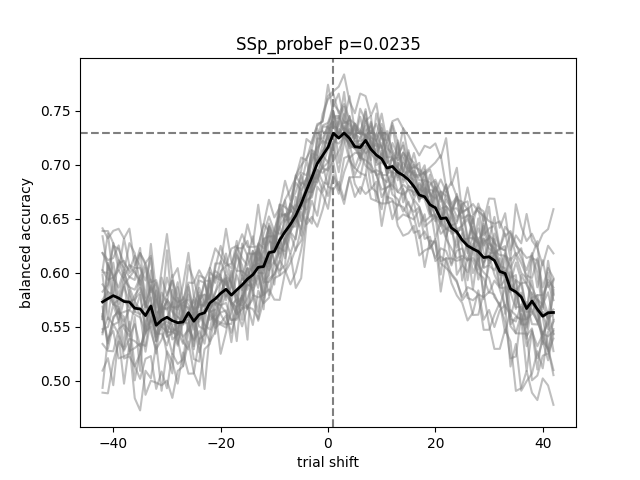

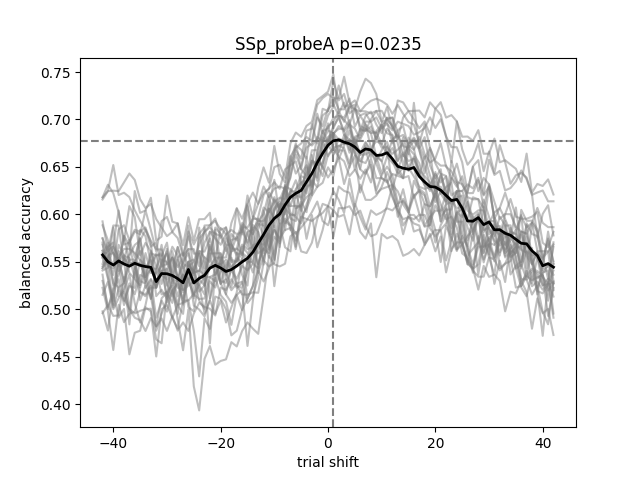

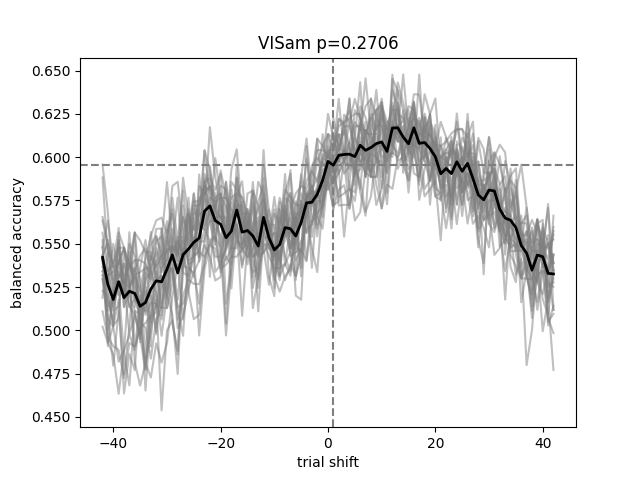

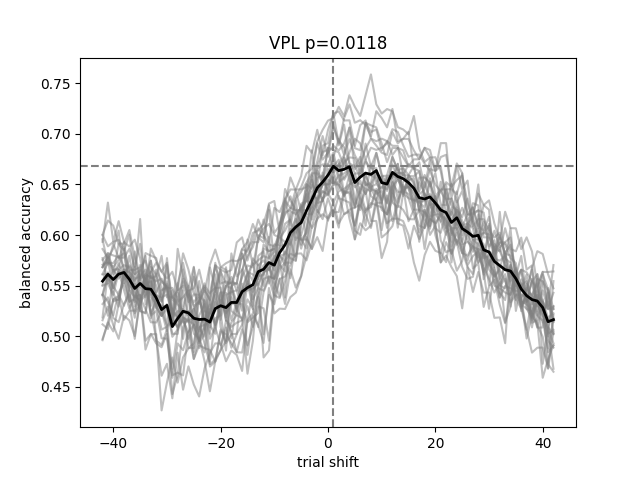

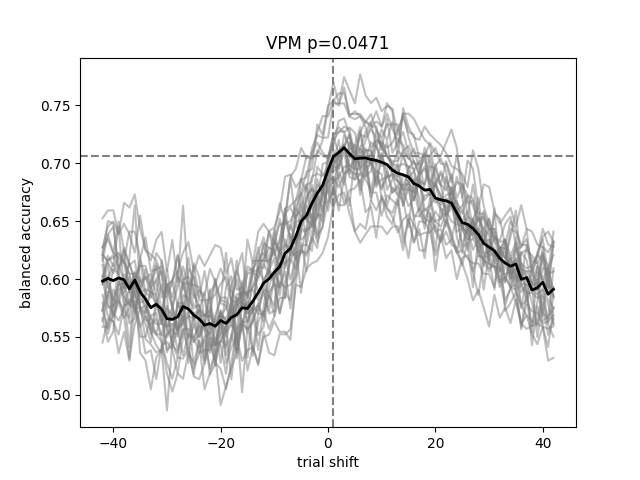

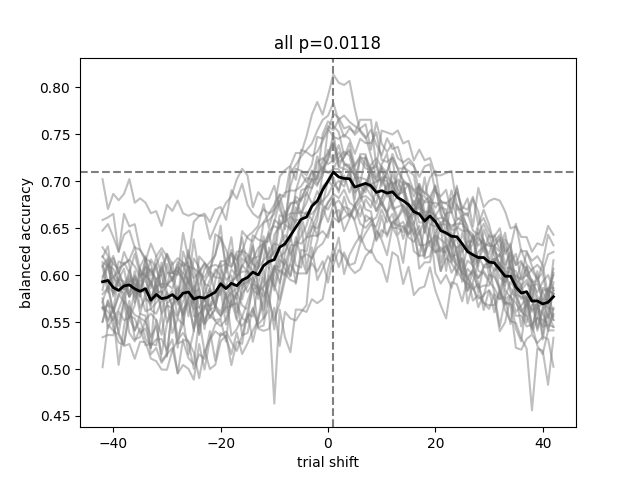

In [3]:
#plot decoding results from one session
sel_session=40

plot_utils.plot_single_session_decoding_results(path=files[sel_session])

## load or concat decoder results across sessions

In [4]:
#load all decoding results, option to concatenate all sessions
concat_session_results=False
all_decoder_results_path=os.path.join(loadpath,'combined','all_unit_linear_shift_use_more_trials.csv')

if concat_session_results:
    all_decoder_results=decoding_utils.concat_decoder_results(files,savepath=None,return_table=True)
else:
    all_decoder_results=pd.read_csv(all_decoder_results_path)


In [5]:
#compute fraction significant, difference from null for DynamicRouting and Templeton projects
all_frac_sig_df,all_diff_from_null_df=decoding_utils.compute_significant_decoding_by_area(all_decoder_results)

## plot decoding accuracy across areas for DR sessions

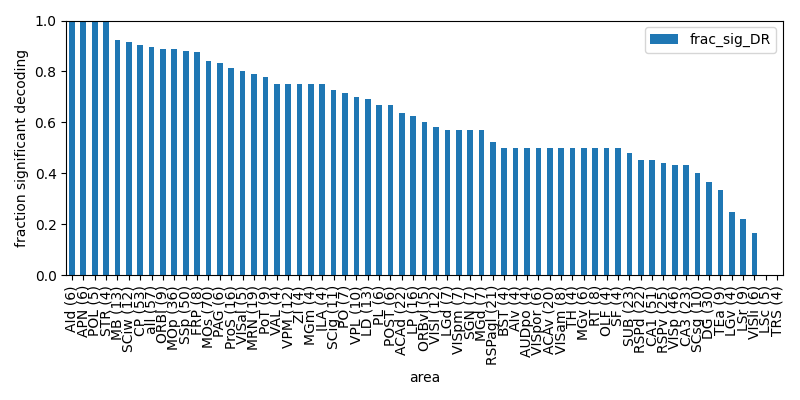

In [6]:
#barplot sorted by fraction significant
min_n_expts=4

plot_DR_frac_sig_df=all_frac_sig_df.query('n_expts_DR>=@min_n_expts').sort_values('frac_sig_DR',ascending=False)
fig,ax=plt.subplots(1,1,figsize=(8,4))
plot_DR_frac_sig_df.plot.bar(x='area',y=['frac_sig_DR'],ax=ax)
ax.set_ylabel('fraction significant decoding')

area_labels=[]
for i in range(plot_DR_frac_sig_df.shape[0]):
    area_labels.append(plot_DR_frac_sig_df['area'].iloc[i]+' ('+str(int(plot_DR_frac_sig_df['n_expts_DR'].iloc[i]))+')')
ax.set_xticklabels(area_labels,rotation=90,ha='center')
ax.set_ylim([0,1])
fig.tight_layout()

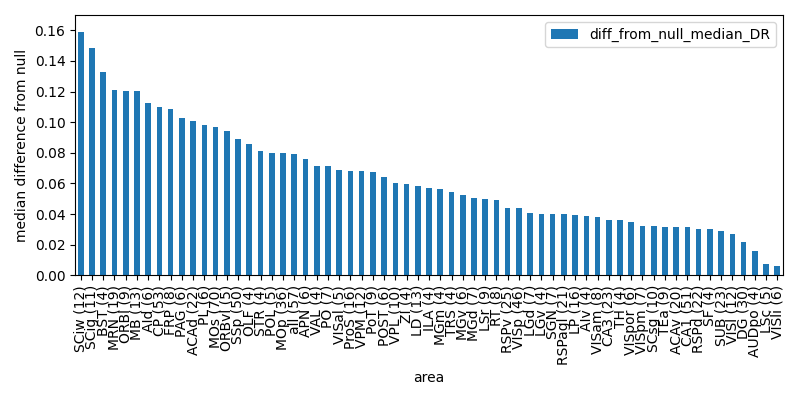

In [7]:
#barplot sorted by DR diff from median
min_n_expts=4

plot_DR_diff_from_null_df=all_diff_from_null_df.query('n_expts_DR>=@min_n_expts').sort_values('diff_from_null_median_DR',ascending=False)
fig,ax=plt.subplots(1,1,figsize=(8,4))
plot_DR_diff_from_null_df.plot.bar(x='area',y=['diff_from_null_median_DR'],ax=ax)

ax.set_ylabel('median difference from null')
area_labels=[]
for i in range(plot_DR_diff_from_null_df.shape[0]):
    area_labels.append(plot_DR_diff_from_null_df['area'].iloc[i]+' ('+str(int(plot_DR_diff_from_null_df['n_expts_DR'].iloc[i]))+')')
ax.set_xticklabels(area_labels,rotation=90,ha='center')

ax.set_ylim([0,0.17])
fig.tight_layout()



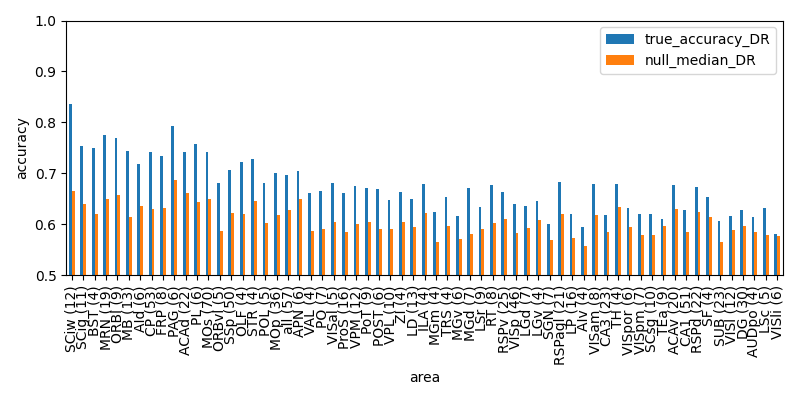

In [8]:
#plot true accuracy and null median on same barplot

min_n_expts=4

plot_DR_diff_from_null_df=all_diff_from_null_df.query('n_expts_DR>=@min_n_expts').sort_values('diff_from_null_median_DR',ascending=False)
fig,ax=plt.subplots(1,1,figsize=(8,4))
plot_DR_diff_from_null_df.plot.bar(x='area',y=['true_accuracy_DR','null_median_DR'],ax=ax)

ax.set_ylabel('accuracy')
area_labels=[]
for i in range(plot_DR_diff_from_null_df.shape[0]):
    area_labels.append(plot_DR_diff_from_null_df['area'].iloc[i]+' ('+str(int(plot_DR_diff_from_null_df['n_expts_DR'].iloc[i]))+')')

ax.set_xticklabels(area_labels,rotation=90,ha='center')

ax.set_ylim([0.5,1.0])
fig.tight_layout()

## compare DR and Templeton

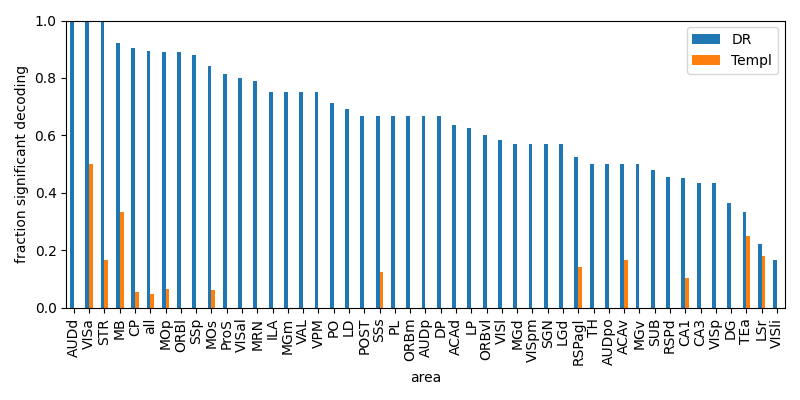

In [9]:
#barplot sorted by fraction significant
min_n_expts=2

plot_all_frac_sig_df=all_frac_sig_df.query('n_expts_DR>=@min_n_expts and n_expts_Templ>=@min_n_expts').sort_values('frac_sig_DR',ascending=False)
fig,ax=plt.subplots(1,1,figsize=(8,4))
plot_all_frac_sig_df.plot.bar(x='area',y=['frac_sig_DR','frac_sig_Templ'],ax=ax)
ax.set_ylabel('fraction significant decoding')
# ax.set_xlabel('area')
ax.legend(['DR','Templ'])
ax.set_ylim([0,1])
fig.tight_layout()

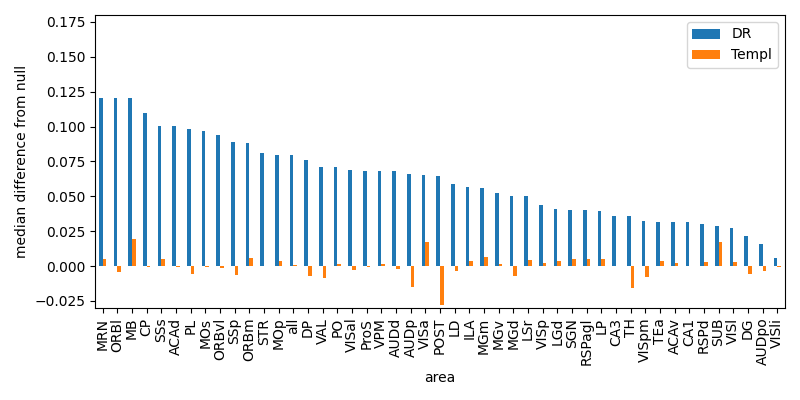

In [10]:
#barplot sorted by DR diff from median
min_n_expts=2

plot_all_diff_from_null_df=all_diff_from_null_df.query('n_expts_DR>=@min_n_expts and n_expts_Templ>=@min_n_expts').sort_values('diff_from_null_median_DR',ascending=False)
fig,ax=plt.subplots(1,1,figsize=(8,4))
plot_all_diff_from_null_df.plot.bar(x='area',y=['diff_from_null_median_DR','diff_from_null_median_Templ'],ax=ax)

ax.set_ylabel('median difference from null')
# ax.set_xlabel('area')
ax.legend(['DR','Templ'])

ax.set_ylim([-0.03,0.18])
fig.tight_layout()
